
### Hotel Reviews Sentiment Analysis - Logistic Regression & Random Forest Comparison
Complete Machine Learning Pipeline with Detailed Model Comparison

This script performs comprehensive sentiment analysis focusing on:
- Data exploration and preprocessing
- Exploratory Data Analysis with visualizations
- Feature engineering and text processing
- Logistic Regression and Random Forest model training
- Detailed comparison between both models
- Performance metrics, ROC plots, and feature importance analysis

Dataset downloaded from Kaggle- https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe  

### Importing the required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           roc_curve, auc, roc_auc_score, precision_recall_curve,
                           precision_score, recall_score, f1_score)
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import time
import warnings
warnings.filterwarnings('ignore')

Downloading essential NLTK resources used for natural language preprocessing:

punkt: Tokenizer for breaking text into sentences/words.

stopwords: List of common words like "the", "and", etc., to remove from text.

wordnet: Word database for lemmatization.

omw-1.4: Multilingual WordNet support.

It will ensure the required linguistic resources are available for text preprocessing like tokenizing, removing stopwords, and lemmatizing hotel reviews.

In [14]:
from google.colab import files
uploaded = files.upload()


Saving Hotel_Reviews.csv to Hotel_Reviews (1).csv


In [16]:
model.df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [17]:
model.df.shape

(515738, 17)

In [19]:
model.df.describe()



,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


In [21]:
model.df.isnull().sum()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


This is the constructor method of the class. It sets up all the important variables the model will use later:

- data_path: location of your CSV file

- sample_size: how many rows to use from the dataset (defaults to 50,000)

- self.df: will store the DataFrame

- X_train, X_test, etc.: for splitting data

- vectorizer: for converting text into numbers (TF-IDF)

- lr_model and rf_model: placeholders for your ML models

*_results: to store evaluation outputs

In [23]:
class HotelSentimentComparison:
    def __init__(self, data_path, sample_size=50000):
        self.data_path = data_path  # File path to CSV
        self.sample_size = sample_size  # Optional sample size
        self.df = None  # Will hold the loaded DataFrame
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.vectorizer = None
        self.lr_model = None
        self.rf_model = None
        self.lr_results = {}
        self.rf_results = {}

    # Adding the missing method
    def load_and_explore_data(self):
        # Here you would implement the code to load and explore your data
        # For example:
        import pandas as pd

        # Load the data
        self.df = pd.read_csv(self.data_path)

        # If sample_size is specified, take a sample
        if self.sample_size and len(self.df) > self.sample_size:
            self.df = self.df.sample(self.sample_size, random_state=42)

        # Basic exploration
        print(f"Dataset shape: {self.df.shape}")
        print("\nFirst few rows:")
        print(self.df.head())
        print("\nColumn information:")
        print(self.df.info())

# Use the name of the uploaded file
model = HotelSentimentComparison(data_path="Hotel_Reviews.csv")

model.load_and_explore_data()

Dataset shape: (50000, 17)

First few rows:
                                            Hotel_Address  \
488440                 Via Senigallia 6 20161 Milan Italy   
274649  Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...   
374688        Mallorca 251 Eixample 08008 Barcelona Spain   
404352  Piazza Della Repubblica 17 Central Station 201...   
451596  Singel 303 309 Amsterdam City Center 1012 WJ A...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
488440                           904   7/21/2017            8.1   
274649                           612  12/12/2016            8.6   
374688                            46  11/26/2015            8.3   
404352                           241  10/17/2015            9.1   
451596                           834   5/16/2016            9.1   

                                        Hotel_Name  \
488440                              Hotel Da Vinci   
274649                           Urban Lodge Hotel   
374688  Alexandra Barcel

In [25]:
print(model.df.columns.tolist())

['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 'days_since_review', 'lat', 'lng']


In [26]:
class HotelSentimentComparison:
    def __init__(self, dataframe):
        """
        Initialize with a full hotel reviews dataframe.
        """
        self.df = dataframe

    def clean_data(self):
        """
        Combines 'Positive_Review' and 'Negative_Review' into 'full_review',
        cleans the text, and stores results in 'cleaned_review'.
        """
        print("="*70)
        print("PHASE 2: TEXT CLEANING ON HOTEL REVIEW DATA")
        print("="*70)

        import nltk
        import re
        import string
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer

        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)

        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()

        def preprocess_text(text):
            text = text.lower()
            if 'no positive' in text or 'no negative' in text:
                text = ''
            text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
            text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
            tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
            return ' '.join(tokens)

        # Drop missing reviews
        self.df.dropna(subset=['Positive_Review', 'Negative_Review'], inplace=True)

        # Combine reviews
        self.df['full_review'] = self.df['Positive_Review'].astype(str) + " " + self.df['Negative_Review'].astype(str)

        # Apply text preprocessing
        print("Cleaning reviews... (this may take a few minutes)")
        self.df['cleaned_review'] = self.df['full_review'].apply(preprocess_text)

        print("Review cleaning complete!")
        print("\nSample cleaned review:\n", self.df['cleaned_review'].iloc[0])



In [28]:
# Load the full dataset
df = pd.read_csv("Hotel_Reviews.csv")

# Create the class instance and clean the data
hotel_sentiment = HotelSentimentComparison(df)
hotel_sentiment.clean_data()

# Check result
print("Final cleaned shape:", hotel_sentiment.df.shape)

PHASE 2: TEXT CLEANING ON HOTEL REVIEW DATA
Cleaning reviews... (this may take a few minutes)
Review cleaning complete!

Sample cleaned review:
 park outside hotel beautiful angry made post available via possible site use planing trip one make mistake booking place made booking via booking com stayed night hotel july upon arrival placed small room nd floor hotel turned room booked specially reserved level duplex room would big window high ceiling room ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining time booked duplex btw cost simple double got way volume due high ceiling offered room next day check next day clock order get room waned best way begin holiday wait till order check new room wonderful waist time room got wanted peaceful internal garden view big window tired waiting room placed belonging rushed city evening turned constant noise room guess made vibrating vent tube something constant ann

In [29]:
# View dataset progress and examine the cleaned dataset
from collections import Counter
import itertools

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Number of rows: {hotel_sentiment.df.shape[0]}")
print(f"Number of columns: {hotel_sentiment.df.shape[1]}")
print("\nColumn names:")
print(hotel_sentiment.df.columns.tolist())

# Sample one row (change sample_idx to see more)
sample_idx = 0  # Change to 1, 2, etc., to view other rows
print("\n" + "="*70)
print("SAMPLE DATA COMPARISON")
print("="*70)

try:
    print("\nORIGINAL DATA:")
    print("-"*50)
    print(f"Positive Review: {hotel_sentiment.df['Positive_Review'].iloc[sample_idx]}")
    print(f"Negative Review: {hotel_sentiment.df['Negative_Review'].iloc[sample_idx]}")

    print("\nCLEANED DATA:")
    print("-"*50)
    print(f"Combined Review: {hotel_sentiment.df['full_review'].iloc[sample_idx]}")
    print(f"Cleaned Review: {hotel_sentiment.df['cleaned_review'].iloc[sample_idx]}")
except Exception as e:
    print("Error displaying sample row: {e}")

#  Text length statistics
print("\n" + "="*70)
print("TEXT CLEANING STATISTICS")
print("="*70)

# Compute text lengths and reduction
hotel_sentiment.df['original_length'] = hotel_sentiment.df['full_review'].apply(lambda x: len(str(x)))
hotel_sentiment.df['cleaned_length'] = hotel_sentiment.df['cleaned_review'].apply(lambda x: len(str(x)))
hotel_sentiment.df['reduction_percent'] = (
    1 - hotel_sentiment.df['cleaned_length'] / hotel_sentiment.df['original_length']
) * 100

print(f"Average original text length: {hotel_sentiment.df['original_length'].mean():.2f} characters")
print(f"Average cleaned text length: {hotel_sentiment.df['cleaned_length'].mean():.2f} characters")
print(f"Average text length reduction: {hotel_sentiment.df['reduction_percent'].mean():.2f}%")

# Word frequency analysis
print("\n" + "="*70)
print("MOST COMMON WORDS IN CLEANED REVIEWS")
print("="*70)

try:
    all_words = list(itertools.chain.from_iterable(
        [str(review).split() for review in hotel_sentiment.df['cleaned_review']]
    ))
    word_counts = Counter(all_words)

    print("Top 30 most common words:")
    for word, count in word_counts.most_common(30):
        print(f"{word}: {count}")
except Exception as e:
    print("Error during word frequency analysis: {e}")


DATASET OVERVIEW
Number of rows: 515738
Number of columns: 19

Column names:
['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 'days_since_review', 'lat', 'lng', 'full_review', 'cleaned_review']

SAMPLE DATA COMPARISON

ORIGINAL DATA:
--------------------------------------------------
Positive Review:  Only the park outside of the hotel was beautiful 
Negative Review:  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not 

In [30]:
class HotelSentimentComparison:
    def __init__(self, df):
        self.df = df

    def explore_data(self):
        import matplotlib.pyplot as plt
        import seaborn as sns

        print("📊 Missing values:")
        print(self.df.isnull().sum())

        # Review Length Histogram
        self.df['cleaned_length'] = self.df['cleaned_review'].apply(len)
        plt.figure(figsize=(8, 4))
        sns.histplot(self.df['cleaned_length'], bins=30, kde=True)
        plt.title('Distribution of Cleaned Review Lengths')
        plt.xlabel('Cleaned Length')
        plt.ylabel('Frequency')
        plt.show()


📊 Missing values:
Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
full_review                                      0
cleaned_review                                   0
original_leng

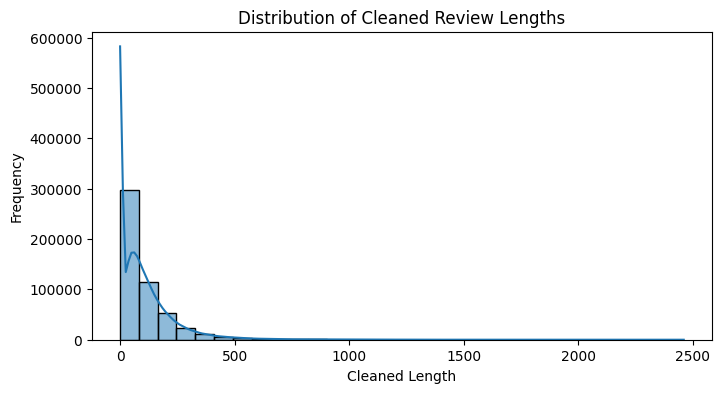

In [31]:
model = HotelSentimentComparison(hotel_sentiment.df)
model.explore_data()


In [32]:
print("Top Longest Reviews (by cleaned length):")
top_long = hotel_sentiment.df.sort_values(by='cleaned_length', ascending=False).head()
print(top_long[['cleaned_review', 'cleaned_length']])


Top Longest Reviews (by cleaned length):
                                           cleaned_review  cleaned_length
137893  bathroom shower going stay twice hotel night r...            2461
488541  hotel located quite bit outskirt city sandwich...            2318
392768  friend warm welcome arrival thank much receive...            2300
90429   staff helpful english put schoolgirl french sh...            2177
242175  clean room although bathtub could upgraded wea...            2145


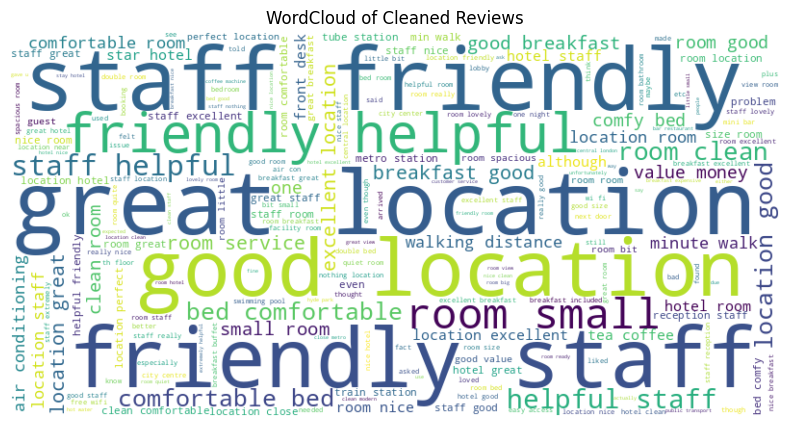

In [33]:
from wordcloud import WordCloud

text = " ".join(hotel_sentiment.df['cleaned_review'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Cleaned Reviews")
plt.show()


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

class HotelSentimentComparison:
    def __init__(self, df):
        self.df = df

    def prepare_features(self):
        print("Cleaning and preparing labels...")

        self.df['label'] = self.df['Positive_Review'].apply(
            lambda x: 0 if str(x).strip().lower() == 'no positive' else 1
        )
        print("Label counts:")
        print(self.df['label'].value_counts())

        print("\nVectorizing cleaned reviews...")
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        self.X = self.vectorizer.fit_transform(self.df['cleaned_review'])
        self.y = self.df['label']

        print("Features prepared. Vector shape:", self.X.shape)
        print("Sample labels:", self.y.tolist()[:20])


In [35]:
model = HotelSentimentComparison(df)
model.prepare_features()


Cleaning and preparing labels...
Label counts:
label
1    479792
0     35946
Name: count, dtype: int64

Vectorizing cleaned reviews...
Features prepared. Vector shape: (515738, 1000)
Sample labels: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [36]:
print(hotel_sentiment.df['Positive_Review'].value_counts().head(10))



Positive_Review
No Positive        35946
 Location           9222
 Everything         2284
 location           1677
 Nothing            1243
 The location       1126
 Great location     1047
 Good location       927
 Location            915
 Everything          613
Name: count, dtype: int64


In [37]:
# Normalize the Positive_Review column
hotel_sentiment.df['Positive_Review'] = (
    hotel_sentiment.df['Positive_Review']
    .str.lower()        # Convert to lowercase
    .str.strip()        # Remove leading/trailing whitespace
)

# Remove generic/unhelpful reviews
unhelpful_reviews = ['no positive', 'nothing']
hotel_sentiment.df = hotel_sentiment.df[
    ~hotel_sentiment.df['Positive_Review'].isin(unhelpful_reviews)
]

# Display top 10 most common cleaned reviews
top_reviews = hotel_sentiment.df['Positive_Review'].value_counts().head(10)
print(top_reviews)


Positive_Review
location              11945
everything             3314
great location         1687
the location           1606
good location          1496
breakfast               795
friendly staff          733
excellent location      639
staff                   553
location and staff      452
Name: count, dtype: int64


In [38]:
print("Label counts:")
print(hotel_sentiment.df['label'].value_counts())


Label counts:
label
1    478061
Name: count, dtype: int64


### Training Logistic Regression Model and Random Forest Model without SMOTE

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split original dataset (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(model.X, model.y, test_size=0.25, random_state=42, stratify=model.y)

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.7465389537363788
              precision    recall  f1-score   support

           0       0.22      1.00      0.35      8987
           1       1.00      0.73      0.84    119948

    accuracy                           0.75    128935
   macro avg       0.61      0.86      0.60    128935
weighted avg       0.95      0.75      0.81    128935

[[ 8987     0]
 [32680 87268]]

Random Forest:
Accuracy: 0.7467406057315702
              precision    recall  f1-score   support

           0       0.22      1.00      0.36      8987
           1       1.00      0.73      0.84    119948

    accuracy                           0.75    128935
   macro avg       0.61      0.86      0.60    128935
weighted avg       0.95      0.75      0.81    128935

[[ 8987     0]
 [32654 87294]]


In [40]:
def check_imbalance(y):
    counts = y.value_counts()
    ratio = counts.min() / counts.max()
    print(f"Imbalance Ratio: {ratio:.4f}")

# Example usage
check_imbalance(df['label'])


Imbalance Ratio: 0.0749


Because of high imbalance i am going to use SMOTE.
In my dataset, the target variable label is highly imbalanced. The majority of the reviews are positive (label = 1), while only a small fraction are negative (label = 0). This imbalance can bias machine learning models to favor the majority class, leading to poor performance in detecting the minority class.

To address this issue, I will use SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic examples of the minority class by interpolating between existing examples. This helps the model learn a more balanced decision boundary, improving recall and F1-score for the minority class without losing important data from the majority class.



In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(model.X, model.y)

# Split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ------------------------------
# Logistic Regression
# ------------------------------
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# ------------------------------
# Random Forest
# ------------------------------
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.8631179103466603
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     95855
           1       1.00      0.73      0.84     96062

    accuracy                           0.86    191917
   macro avg       0.89      0.86      0.86    191917
weighted avg       0.89      0.86      0.86    191917

[[95855     0]
 [26270 69792]]
Random Forest:
Accuracy: 0.8633784396379685
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     95855
           1       1.00      0.73      0.84     96062

    accuracy                           0.86    191917
   macro avg       0.89      0.86      0.86    191917
weighted avg       0.89      0.86      0.86    191917

[[95855     0]
 [26220 69842]]


After using SMOTE the accuracy of both the models increased significantly from 74% to 86%.

In [42]:
print(type(y_prob_lr))
print(type(y_prob_rf))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


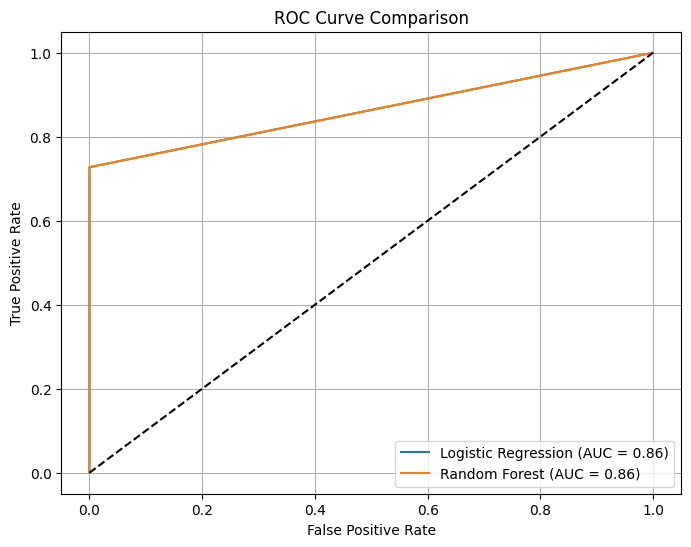

In [43]:
# ROC Curve for Logistic Regression and Random Forest
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR and TPR
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Plot the ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_lr, tpr_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_rf, tpr_rf)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference

# Chart styling
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The ROC curve is used to evaluate the classification performance of our models — Logistic Regression and Random Forest — by illustrating the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) across different threshold settings.

In the above plot:

- Both Logistic Regression and Random Forest models achieved an AUC (Area Under Curve) score of 0.86, which indicates high classification performance.

- An AUC of 0.86 means there is an 86% chance that the model will correctly distinguish between the positive and negative classes.

- The ROC curves for both models almost completely overlap, suggesting that they perform equally well on this dataset.

The dashed diagonal line represents a random classifier (AUC = 0.5). Both models perform significantly better than random guessing, as their ROC curves are well above this baseline.

### Bidirectional LSTM Model
In addition to traditional machine learning models like Logistic Regression and Random Forest, this project implements a Bidirectional Long Short-Term Memory (BiLSTM) model to capture deeper semantic and contextual relationships in hotel review texts.Ar then end i will compare all the models and their accuracy.

In [44]:
!pip install tensorflow


In [45]:
print(df.columns)


Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'full_review', 'cleaned_review',
       'original_length', 'cleaned_length', 'reduction_percent', 'label'],
      dtype='object')


In [9]:
# -------------------------------
# STEP 1: UPLOAD FILE TO COLAB
# -------------------------------
from google.colab import files
import pandas as pd
import os

# Upload CSV file
uploaded = files.upload()

# Set file path
file_path = "Hotel_Reviews.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found after upload: {file_path}")

# Read the CSV file
df = pd.read_csv(file_path)

# -------------------------------
# STEP 2: TEXT CLEANING SETUP
# -------------------------------
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_nltk(text):
    text = text.lower()
    if 'no positive' in text or 'no negative' in text:
        text = ''
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Drop missing reviews
df.dropna(subset=['Positive_Review', 'Negative_Review'], inplace=True)

# Combine and clean reviews
df['full_review'] = df['Positive_Review'].astype(str) + " " + df['Negative_Review'].astype(str)
print("Cleaning reviews...")
df['cleaned_review'] = df['full_review'].apply(preprocess_text_nltk)
print("Cleaning complete!")

# -------------------------------
# STEP 3: LABELING
# -------------------------------
# 1 = Positive review exists, 0 = No positive review
df['label'] = df['Positive_Review'].apply(lambda x: 0 if str(x).strip().lower() == 'no positive' else 1)
print("\nLabel distribution:\n", df['label'].value_counts())

# -------------------------------
# STEP 4: TOKENIZATION & PADDING
# -------------------------------
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

texts = df['cleaned_review'].astype(str).values
labels = df['label'].values

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# STEP 5: BUILD & TRAIN BiLSTM
# -------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

print("Training model...")
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop]
)

# -------------------------------
# STEP 6: EVALUATE
# -------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")


Saving Hotel_Reviews.csv to Hotel_Reviews.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Cleaning reviews...
Cleaning complete!

Label distribution:
 label
1    479792
0     35946
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training model...
Epoch 1/3
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 50s 15ms/step - accuracy: 0.9293 - loss: 0.1845 - val_accuracy: 0.9303 - val_loss: 0.1679
Epoch 2/3
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - accuracy: 0.9306 - loss: 0.1683 - val_accuracy: 0.9303 - val_loss: 0.1670
Epoch 3/3
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.9311 - loss: 0.1670 - val_accuracy: 0.9303 - val_loss: 0.1673
3224/3224 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9310 - loss: 0.1666

✅ Test Accuracy: 0.9299, Test Loss: 0.1683


3224/3224 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step


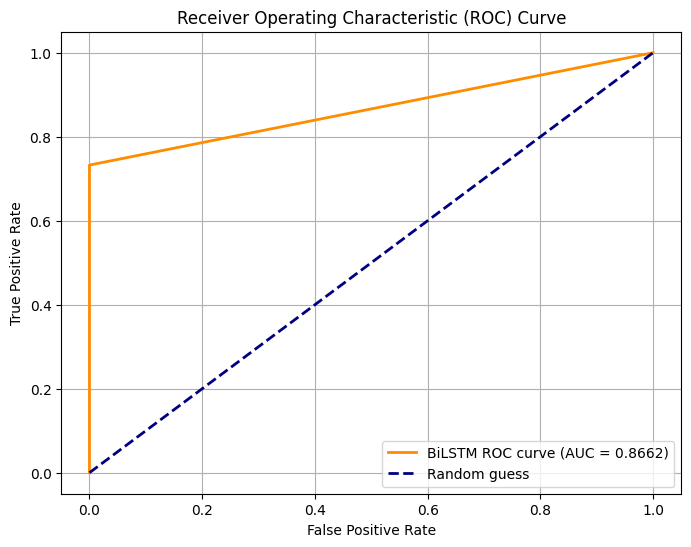

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Predict probabilities
y_probs = model.predict(X_test).ravel()  # Get predicted probabilities

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 3. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'BiLSTM ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The ROC curve for the BiLSTM model demonstrates a strong classification performance with an AUC of 0.8662. This suggests the model has a high capability to distinguish between positive and negative hotel reviews, significantly outperforming a random classifier.

In [11]:
import os

# Defining save path for my model model
model_path = r"C:\Users\knowl\OneDrive\Desktop\hotel_ai_agent\models\bilstm_sentiment_model.h5"

# Save the model
model.save(model_path)

print("BiLSTM model saved at: {model_path}")



BiLSTM model saved at: {model_path}


To enable intelligent response handling in my future project of Hotel AI Concierge Agent, I saved the trained Bidirectional LSTM (BiLSTM) sentiment analysis model to AI Agent folder on my desktop. This saved model will later be loaded by the AI agent to analyze guest reviews and determine their sentiment in real time.

The .h5 file contains:

- The full model architecture

- Learned weights

- Optimizer and loss configuration

Purpose:
- This allows the AI Concierge Agent to:

- Automatically detect whether a review is positive or negative

- Trigger smart actions like service recovery for negative feedback or reward programs for positive feedback

- Operate efficiently without retraining the model every time

> The following analysis has now been re-run using the **entire dataset** instead of a 50,000-row sample. This allows for a more robust and generalizable evaluation of model performance.


In [12]:
class HotelSentimentComparison:
    def __init__(self, data_path, sample_size=None):
        """
        Initializes the sentiment comparison object.

        Parameters:
        - data_path (str): Path to the CSV file
        - sample_size (int or None): Number of rows to sample; if None, loads full dataset
        """
        self.data_path = data_path
        self.sample_size = sample_size
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.vectorizer = None
        self.lr_model = None
        self.rf_model = None
        self.lr_results = {}
        self.rf_results = {}

    def load_and_explore_data(self):
        """
        Loads the dataset and performs basic exploration.
        If a sample_size is provided and smaller than the dataset,
        it takes a random sample.
        """
        import pandas as pd

        # Load full dataset
        self.df = pd.read_csv(self.data_path)

        # Optional sampling
        if self.sample_size and len(self.df) > self.sample_size:
            self.df = self.df.sample(self.sample_size, random_state=42)

        # Basic exploration
        print(f"Dataset shape: {self.df.shape}")
        print("\nFirst few rows:")
        print(self.df.head())
        print("\nColumn information:")
        print(self.df.info())

model = HotelSentimentComparison(data_path="Hotel_Reviews.csv")
model.load_and_explore_data()

Dataset shape: (515738, 17)

First few rows:
                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1            

In [13]:
print(model.df.shape)


(515738, 17)


In [14]:
class HotelSentimentComparison:
    def __init__(self, dataframe):
        """
        Initialize with a full hotel reviews dataframe.
        """
        self.df = dataframe

    def clean_data(self):
        """
        Combines 'Positive_Review' and 'Negative_Review' into 'full_review',
        cleans the text, and stores results in 'cleaned_review'.
        """
        print("="*70)
        print("PHASE 2: TEXT CLEANING ON HOTEL REVIEW DATA")
        print("="*70)

        import nltk
        import re
        import string
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer

        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)

        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()

        def preprocess_text(text):
            text = text.lower()
            if 'no positive' in text or 'no negative' in text:
                text = ''
            text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
            text = re.sub(r'\d+', '', text)  # Remove numbers
            text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
            text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
            tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
            return ' '.join(tokens)

        # Drop missing reviews
        self.df.dropna(subset=['Positive_Review', 'Negative_Review'], inplace=True)

        # Combine reviews
        self.df['full_review'] = self.df['Positive_Review'].astype(str) + " " + self.df['Negative_Review'].astype(str)

        # Apply text preprocessing
        print("Cleaning reviews... (this may take a few minutes)")
        self.df['cleaned_review'] = self.df['full_review'].apply(preprocess_text)

        print("Review cleaning complete!")
        print("\nSample cleaned review:\n", self.df['cleaned_review'].iloc[0])



In [16]:
# Load the full dataset
df = pd.read_csv("Hotel_Reviews.csv") # Use the uploaded file name

# Create the class instance and clean the data
hotel_sentiment = HotelSentimentComparison(df)
hotel_sentiment.clean_data()

# Check result
print("Final cleaned shape:", hotel_sentiment.df.shape)

PHASE 2: TEXT CLEANING ON HOTEL REVIEW DATA
Cleaning reviews... (this may take a few minutes)
Review cleaning complete!

Sample cleaned review:
 park outside hotel beautiful angry made post available via possible site use planing trip one make mistake booking place made booking via booking com stayed night hotel july upon arrival placed small room nd floor hotel turned room booked specially reserved level duplex room would big window high ceiling room ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining time booked duplex btw cost simple double got way volume due high ceiling offered room next day check next day clock order get room waned best way begin holiday wait till order check new room wonderful waist time room got wanted peaceful internal garden view big window tired waiting room placed belonging rushed city evening turned constant noise room guess made vibrating vent tube something constant ann

In [17]:
# View dataset progress and examine the cleaned dataset
from collections import Counter
import itertools

print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Number of rows: {hotel_sentiment.df.shape[0]}")
print(f"Number of columns: {hotel_sentiment.df.shape[1]}")
print("\nColumn names:")
print(hotel_sentiment.df.columns.tolist())

# Sample one row (change sample_idx to see more)
sample_idx = 0  # Change to 1, 2, etc., to view other rows
print("\n" + "="*70)
print("SAMPLE DATA COMPARISON")
print("="*70)

try:
    print("\nORIGINAL DATA:")
    print("-"*50)
    print(f"Positive Review: {hotel_sentiment.df['Positive_Review'].iloc[sample_idx]}")
    print(f"Negative Review: {hotel_sentiment.df['Negative_Review'].iloc[sample_idx]}")

    print("\nCLEANED DATA:")
    print("-"*50)
    print(f"Combined Review: {hotel_sentiment.df['full_review'].iloc[sample_idx]}")
    print(f"Cleaned Review: {hotel_sentiment.df['cleaned_review'].iloc[sample_idx]}")
except Exception as e:
    print("Error displaying sample row: {e}")

#  Text length statistics
print("\n" + "="*70)
print("TEXT CLEANING STATISTICS")
print("="*70)

# Compute text lengths and reduction
hotel_sentiment.df['original_length'] = hotel_sentiment.df['full_review'].apply(lambda x: len(str(x)))
hotel_sentiment.df['cleaned_length'] = hotel_sentiment.df['cleaned_review'].apply(lambda x: len(str(x)))
hotel_sentiment.df['reduction_percent'] = (
    1 - hotel_sentiment.df['cleaned_length'] / hotel_sentiment.df['original_length']
) * 100

print(f"Average original text length: {hotel_sentiment.df['original_length'].mean():.2f} characters")
print(f"Average cleaned text length: {hotel_sentiment.df['cleaned_length'].mean():.2f} characters")
print(f"Average text length reduction: {hotel_sentiment.df['reduction_percent'].mean():.2f}%")

# Word frequency analysis
print("\n" + "="*70)
print("MOST COMMON WORDS IN CLEANED REVIEWS")
print("="*70)

try:
    all_words = list(itertools.chain.from_iterable(
        [str(review).split() for review in hotel_sentiment.df['cleaned_review']]
    ))
    word_counts = Counter(all_words)

    print("Top 30 most common words:")
    for word, count in word_counts.most_common(30):
        print(f"{word}: {count}")
except Exception as e:
    print("Error during word frequency analysis: {e}")


DATASET OVERVIEW
Number of rows: 515738
Number of columns: 19

Column names:
['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 'days_since_review', 'lat', 'lng', 'full_review', 'cleaned_review']

SAMPLE DATA COMPARISON

ORIGINAL DATA:
--------------------------------------------------
Positive Review:  Only the park outside of the hotel was beautiful 
Negative Review:  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not 

Missing values:
Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
combined_review                                  0
cleaned_review                                   0
dtype: int64


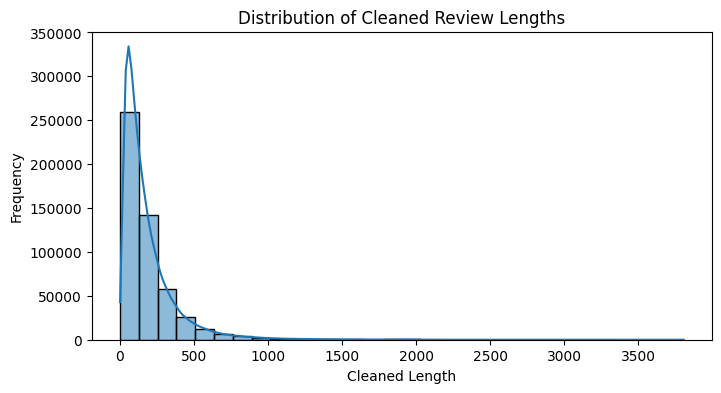

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 1: Load your dataset
df = pd.read_csv("Hotel_Reviews.csv") # Use the uploaded file name

# STEP 2: Combine and clean reviews
def preprocess_reviews(df):
    # Combine positive and negative reviews
    df['combined_review'] = df['Positive_Review'].fillna('') + ' ' + df['Negative_Review'].fillna('')

    # Clean text: lowercase and remove punctuation
    df['cleaned_review'] = df['combined_review'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

    return df

# Apply preprocessing
df = preprocess_reviews(df)

# STEP 3: Define the class
class HotelSentimentComparison:
    def __init__(self, df):
        self.df = df

    def explore_data(self):
        print("Missing values:")
        print(self.df.isnull().sum())

        # Plot histogram of review length
        self.df['cleaned_length'] = self.df['cleaned_review'].apply(len)
        plt.figure(figsize=(8, 4))
        sns.histplot(self.df['cleaned_length'], bins=30, kde=True)
        plt.title('Distribution of Cleaned Review Lengths')
        plt.xlabel('Cleaned Length')
        plt.ylabel('Frequency')
        plt.show()

# STEP 4: Create object and run
model = HotelSentimentComparison(df)
model.explore_data()

In [20]:
print("Top Longest Reviews (by cleaned length):")
top_long = hotel_sentiment.df.sort_values(by='cleaned_length', ascending=False).head()
print(top_long[['cleaned_review', 'cleaned_length']])


Top Longest Reviews (by cleaned length):
                                           cleaned_review  cleaned_length
137893  bathroom shower going stay twice hotel night r...            2461
488541  hotel located quite bit outskirt city sandwich...            2318
392768  friend warm welcome arrival thank much receive...            2300
90429   staff helpful english put schoolgirl french sh...            2177
242175  clean room although bathtub could upgraded wea...            2145


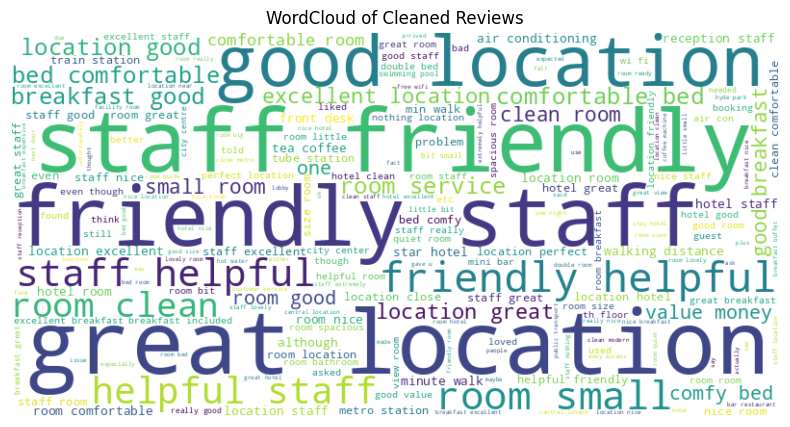

In [21]:
from wordcloud import WordCloud

text = " ".join(hotel_sentiment.df['cleaned_review'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Cleaned Reviews")
plt.show()

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# === Preprocessing Function ===
def preprocess_reviews(df):
    """
    Combines positive and negative reviews into a single cleaned text column.
    """
    df['combined_review'] = df['Positive_Review'].fillna('') + ' ' + df['Negative_Review'].fillna('')
    df['cleaned_review'] = df['combined_review'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
    return df

# === Load the Full Dataset and Preprocess ===
df = pd.read_csv("Hotel_Reviews.csv")
df = preprocess_reviews(df)

# === Define the Sentiment Analysis Class ===
class HotelSentimentComparison:
    def __init__(self, df):
        self.df = df
        self.vectorizer = None
        self.X = None
        self.y = None

    def prepare_features(self):
        print("Cleaning and preparing labels...")

        # Create binary labels: 0 if no positive review, else 1
        self.df['label'] = self.df['Positive_Review'].apply(
            lambda x: 0 if str(x).strip().lower() == 'no positive' else 1
        )
        print("Label counts:")
        print(self.df['label'].value_counts())

        # Vectorize the cleaned review text
        print("\nVectorizing cleaned reviews...")
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        self.X = self.vectorizer.fit_transform(self.df['cleaned_review'])
        self.y = self.df['label']

        print("Features prepared. Vector shape:", self.X.shape)
        print("Sample labels:", self.y.tolist()[:20])

# Run Class
model = HotelSentimentComparison(df)
model.prepare_features()

Cleaning and preparing labels...
Label counts:
label
1    479792
0     35946
Name: count, dtype: int64

Vectorizing cleaned reviews...
Features prepared. Vector shape: (515738, 1000)
Sample labels: [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split original dataset (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(model.X, model.y, test_size=0.25, random_state=42, stratify=model.y)

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.998697017877225
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8987
           1       1.00      1.00      1.00    119948

    accuracy                           1.00    128935
   macro avg       0.99      1.00      1.00    128935
weighted avg       1.00      1.00      1.00    128935

[[  8982      5]
 [   163 119785]]

Random Forest:
Accuracy: 0.9989064257183853
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8987
           1       1.00      1.00      1.00    119948

    accuracy                           1.00    128935
   macro avg       1.00      1.00      1.00    128935
weighted avg       1.00      1.00      1.00    128935

[[  8918     69]
 [    72 119876]]


In [25]:
# -------------------------------
# STEP 1: UPLOAD FILE TO COLAB
# -------------------------------
from google.colab import files
import pandas as pd
import os

# Upload CSV file
uploaded = files.upload()

# Set file path
file_path = "Hotel_Reviews.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found after upload: {file_path}")

# Read the CSV file
df = pd.read_csv(file_path)

# -------------------------------
# STEP 2: TEXT CLEANING SETUP
# -------------------------------
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    if 'no positive' in text or 'no negative' in text:
        text = ''
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Drop missing reviews
df.dropna(subset=['Positive_Review', 'Negative_Review'], inplace=True)

# Combine and clean reviews
df['full_review'] = df['Positive_Review'].astype(str) + " " + df['Negative_Review'].astype(str)
print("Cleaning reviews...")
df['cleaned_review'] = df['full_review'].apply(preprocess_text)
print("Cleaning complete!")

# -------------------------------
# STEP 3: LABELING
# -------------------------------
df['label'] = df['Positive_Review'].apply(lambda x: 0 if str(x).strip().lower() == 'no positive' else 1)
print("\nLabel distribution:\n", df['label'].value_counts())

# -------------------------------
# STEP 4: TOKENIZATION & PADDING
# -------------------------------
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

texts = df['cleaned_review'].astype(str).values
labels = df['label'].values

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# STEP 5: BUILD & TRAIN BiLSTM
# -------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

print("Training model...")
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.1,
    callbacks=[early_stop]
)

# -------------------------------
# STEP 6: EVALUATE
# -------------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")


Saving Hotel_Reviews.csv to Hotel_Reviews (1).csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cleaning reviews...
Cleaning complete!

Label distribution:
 label
1    479792
0     35946
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training model...
Epoch 1/3
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.9291 - loss: 0.1862 - val_accuracy: 0.9303 - val_loss: 0.1678
Epoch 2/3
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.9311 - loss: 0.1675 - val_accuracy: 0.9303 - val_loss: 0.1673
Epoch 3/3
2902/2902 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.9304 - loss: 0.1681 - val_accuracy: 0.9303 - val_loss: 0.1670
3224/3224 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9310 - loss: 0.1662
Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}


In [27]:
# ----------------------------------------
# Classification Report
# ----------------------------------------
from sklearn.metrics import classification_report

# Predict probabilities and round for class prediction
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


3224/3224 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7231
           1       0.93      1.00      0.96     95917

    accuracy                           0.93    103148
   macro avg       0.46      0.50      0.48    103148
weighted avg       0.86      0.93      0.90    103148



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


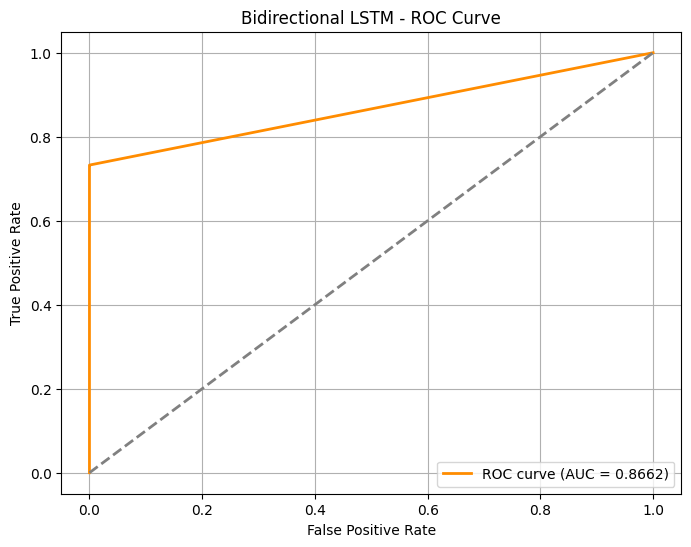

In [28]:
# ----------------------------------------
# ROC Curve & AUC
# ----------------------------------------
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get FPR, TPR and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bidirectional LSTM - ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [29]:
# ----------------------------------------
# Save the model
# ----------------------------------------
# Save model to local directory (for Google Colab)
model.save("hotel_bilstm_model.h5")
print("Model saved as hotel_bilstm_model.h5")

# Download the file from Colab
from google.colab import files
files.download("hotel_bilstm_model.h5")


Model saved as hotel_bilstm_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Install Git
!apt-get install git

# Configure Git
!git config --global user.email "ameytillu1994@gmail.com"
!git config --global user.name "Ameytillu"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [31]:
!git clone https://github.com/Ameytillu/hotel-review-sentiment-analysis.git


Cloning into 'hotel-review-sentiment-analysis'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 6.43 KiB | 6.43 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [34]:
!ls


'C:\Users\knowl\OneDrive\Desktop\hotel_ai_agent\models\bilstm_sentiment_model.h5'
 hotel_bilstm_model.h5
'Hotel_Reviews (1).csv'
 Hotel_Reviews.csv
 hotel-review-sentiment-analysis
 sample_data


In [35]:
!ls *.ipynb


ls: cannot access '*.ipynb': No such file or directory
